In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [24]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3, min_samples=2).fit(x)
y=db.fit_predict(x)
y

array([ 0, -1,  1,  2,  0,  2,  1, -1, -1, -1,  3, -1,  3,  4,  3,  4,  5,
       -1, -1, -1,  5,  6, -1,  6, -1, -1,  7, -1,  7, -1,  8, -1,  8, -1,
       -1, -1, -1, -1,  9, -1, 10, -1, 10, -1,  9, -1, -1, -1, 11, 11, 12,
       13, 12, 13, 12, -1, 12, 12, 12, 12, 14, 14, 12, 15, 12, 15, 12, 12,
       15, 12, 14, -1, 12, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, -1, -1, 17, 18, -1, 19, 17, 19, 17, 18, 17, 19, -1,
       19, 17, -1, 17, 19, -1, -1, 20, -1, -1, 21, 22, 23, 20, 23, 20, 23,
       22, 23, 20, 24, 22, 24, 22, 21, -1, -1, -1, 25, 26, -1, -1, 25, -1,
       27, 26, 27, -1, 27, -1, 27, -1, -1, -1, -1, 28, -1, 28, -1, -1, 29,
       30, -1, -1, 29, 30, -1, -1, -1, -1, -1, -1, -1, -1])

In [25]:
supervised=df

In [26]:
supervised['cluster_values']=y
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_values
0,1,Male,19,15,39,0
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [27]:
supervised.to_csv("clustered_data.csv",index=False)

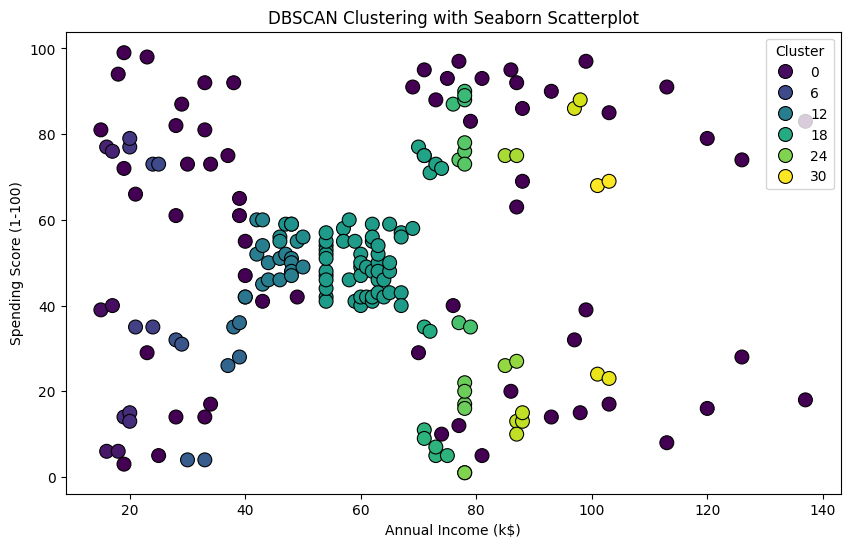

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=supervised.columns[3], 
    y=supervised.columns[4], 
    hue='cluster_values', 
    palette='viridis', 
    data=supervised, 
    s=100, edgecolor='k'
)

# Enhance plot details
plt.title('DBSCAN Clustering with Seaborn Scatterplot')
plt.xlabel(supervised.columns[3])  # Dynamic x-axis label
plt.ylabel(supervised.columns[4])  # Dynamic y-axis label
plt.legend(title='Cluster', loc='upper right')
plt.show()

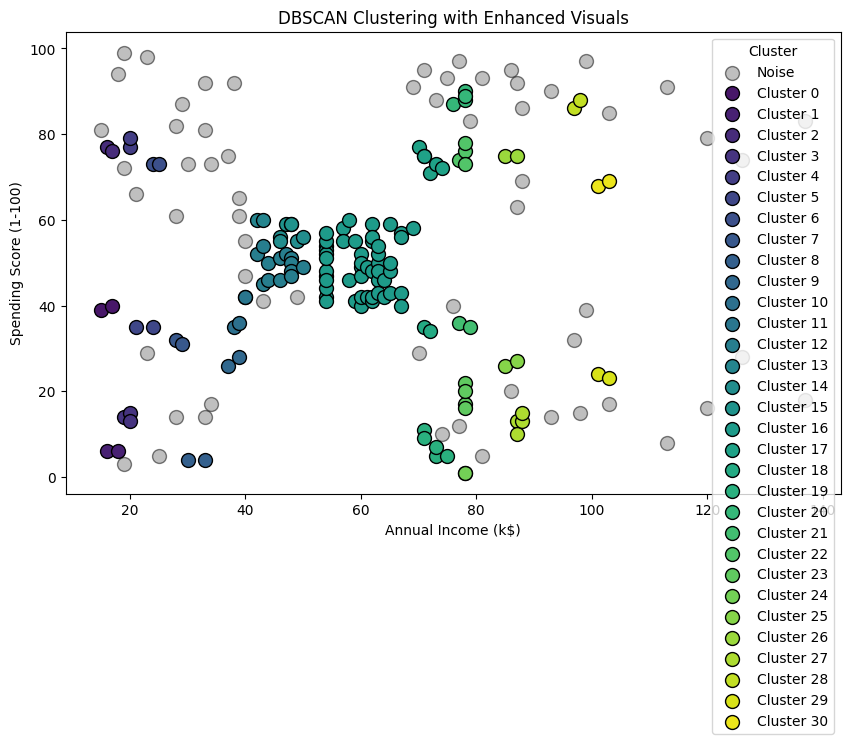

In [30]:
# Plotting the clusters with enhanced visuals
plt.figure(figsize=(10, 6))
unique_labels = np.unique(y)

# Use different colors for noise points (label = -1)
palette = sns.color_palette("viridis", len(unique_labels))
for i, label in enumerate(unique_labels):
    if label == -1:
        # Plot noise points in grey
        plt.scatter(x[y == label, 0], x[y == label, 1], 
                    s=100, color="grey", label="Noise", edgecolor='k', alpha=0.5)
    else:
        # Plot each cluster with different color
        plt.scatter(x[y == label, 0], x[y == label, 1], 
                    s=100, color=palette[i], label=f'Cluster {label}', edgecolor='k')

plt.title('DBSCAN Clustering with Enhanced Visuals')
plt.xlabel(supervised.columns[3])  # Dynamic x-axis label
plt.ylabel(supervised.columns[4])  # Dynamic y-axis label
# Ensure legend is populated
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, title='Cluster', loc='upper right')
plt.show()